# **QR Code Generator and Decoder Using Python & OpenCV**

**Problem Statement:**

In today’s digital world, QR codes are widely used for storing and sharing information efficiently. However, generating and decoding QR codes often requires standalone applications or manual implementations. This project aims to develop an interactive QR Code Generator and Decoder using Python, OpenCV, and Gradio in Google Colab.

The system will allow users to:

✅ Enter text to generate a QR code image.

✅ Upload a QR code image to extract and decode the embedded text.

By integrating an easy-to-use web interface, this project provides a simple and efficient way to handle QR codes without requiring specialized software.

**Step 1: Install Required Libraries**

In [1]:
pip install qrcode[pil] opencv-python pyzbar

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 3.0 MB/s eta 0:00:00


**Step 2:** Generate a QR Code

**Explanation**

**Take user input:** Get a string from the user to convert into a QR code.

**Generate QR Code:** Use the qrcode library to create a QR code.

**Save the QR Code:** The generated QR code is saved as an image.

**Display the QR Code:** Open the QR code image using OpenCV.

Enter text to generate QR Code: My name is Guru Aswini Dath
QR Code saved as qr_code.png


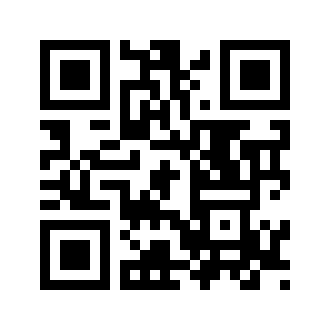

In [3]:
import qrcode
import cv2
from google.colab.patches import cv2_imshow  # Import for displaying images in Colab

def generate_qr_code(data, file_name="qr_code.png"):
    # Create a QR code instance
    qr = qrcode.QRCode(
        version=1,
        error_correction=qrcode.constants.ERROR_CORRECT_L,
        box_size=10,
        border=4
    )
    qr.add_data(data)
    qr.make(fit=True)

    # Generate and save the QR code image
    qr_img = qr.make_image(fill="black", back_color="white")
    qr_img.save(file_name)

    print(f"QR Code saved as {file_name}")

    # Read and display the QR code image in Colab
    img = cv2.imread(file_name)
    cv2_imshow(img)

# Example usage
text = input("Enter text to generate QR Code: ")
generate_qr_code(text)

**Step 3:** Decode a QR Code

**Explanation**

**Read the QR Code Image:** Use OpenCV to load an image.

**Detect and Decode:** Use pyzbar or OpenCV’s built-in cv2.QRCodeDetector().

**Print Decoded Data:** Extract and display the text stored in the QR code.

In [6]:
import cv2

def decode_qr_code_opencv(file_name):
    # Read the image
    img = cv2.imread(file_name)

    # Check if image is loaded properly
    if img is None:
        print("Error: Image not found or could not be loaded.")
        return None

    # Initialize QR Code detector
    detector = cv2.QRCodeDetector()

    # Detect and decode the QR code
    data, bbox, _ = detector.detectAndDecode(img)

    if data:
        print(f"Decoded QR Code: {data}")
        return data
    else:
        print("No QR code found.")
        return None

# Example usage
decode_qr_code_opencv("Anna Katrina.png")

No QR code found.


# **Interface**

In [7]:
!pip install gradio qrcode opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [9]:
import gradio as gr
import qrcode
import cv2
import numpy as np
from PIL import Image

# Function to generate a QR Code from text
def generate_qr(text):
    qr = qrcode.QRCode(
        version=1,
        error_correction=qrcode.constants.ERROR_CORRECT_L,
        box_size=10,
        border=4
    )
    qr.add_data(text)
    qr.make(fit=True)

    qr_img = qr.make_image(fill="black", back_color="white")
    qr_img.save("generated_qr.png")

    return "generated_qr.png"

# Function to decode QR Code from an uploaded image
def decode_qr(uploaded_img):
    try:
        # Convert the uploaded file to an OpenCV image
        image = Image.open(uploaded_img).convert("RGB")  # Open image with PIL
        image = np.array(image)  # Convert PIL image to numpy array
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # Convert RGB to BGR (OpenCV format)

        detector = cv2.QRCodeDetector()
        data, _, _ = detector.detectAndDecode(image)

        if data:
            return f"Decoded Text: {data}"
        else:
            return "No QR Code found in the image."
    except Exception as e:
        return f"Error decoding QR Code: {e}"

# Create Gradio interface
qr_interface = gr.Interface(
    title="QR Code Generator & Decoder",
    description="Enter text to generate a QR Code or upload an image to decode a QR Code.",
    inputs=[
        gr.Textbox(label="Enter Text for QR Code", placeholder="Type here..."),
        gr.File(label="Upload QR Code Image for Decoding")
    ],
    outputs=[
        gr.Image(label="Generated QR Code"),
        gr.Textbox(label="Decoded QR Text")
    ],
    fn=lambda text, image: (
        generate_qr(text) if text else None,  # Generate QR code if text is provided
        decode_qr(image) if image else None  # Decode QR code if image is uploaded
    ),
)

# Launch the interface
qr_interface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://16540343c7220f609a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
